<a href="https://colab.research.google.com/github/AftabUdaipurwala/MachineLearningBasics/blob/ClassificationModels/IMS_Demo_1_PCA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Library Section

In [ ]:
pip install bioinfokit

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 84 kB 2.4 MB/s 
  Created wheel for bioinfokit: filename=bioinfokit-2.0.8-py3-none-any.whl size=56750 sha256=6dcc54d03f612f76ef265536cb155101849d3163be644d5a1484366ff405a1bd
  Stored in directory: /root/.cache/pip/wheels/0d/b0/a4/2be59655e33c889f2197d43e99ed077f05a6559e24ce28e21a
  Created wheel for adjustText: filename=adjustText-0.7.3-py3-none-any.whl size=7097 sha256=625a2fa787ae0f195733c45e2ed14632fdf2079bab846cc2f9a0fd86bbe074be
  Stored in directory: /root/.cache/pip/wheels/2f/98/32/afbf902d8f040fadfdf0a44357e4ab750afe165d873bf5893d
Successfully built bioinfokit adjustText


In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_iris
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt
import cv2
from google.colab.patches import cv2_imshow
from scipy.stats import pearsonr
import warnings
warnings.filterwarnings("ignore")
from google.colab import drive
from bioinfokit.visuz import cluster
from bioinfokit.analys import get_data

# Load Data

In [ ]:
from sklearn.datasets import load_iris
data = load_iris(as_frame=True)
data_iris = data.data
data_iris['Target']=pd.DataFrame(data.target)
data_iris['Target'] = data_iris['Target'].map({0: 'setosa', 1: 'versicolor', 2: 'virginica'})
data_iris.head(5)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Target
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


# Check Data Metrics

In [ ]:
data_iris.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


# Train Test split

In [ ]:
X=data_iris[['sepal length (cm)','sepal width (cm)','petal length (cm)','petal width (cm)']]
y=pd.DataFrame(data.target)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(100, 4) (50, 4) (100, 1) (50, 1)


# Check Correlations in data

In [ ]:
def corrfunc(x, y, ax=None, **kws):
    """Plot the correlation coefficient in the top left hand corner of a plot."""
    r, _ = pearsonr(x, y)
    ax = ax or plt.gca()
    ax.annotate(f'ρ = {r:.2f}', xy=(.1, .9), xycoords=ax.transAxes)

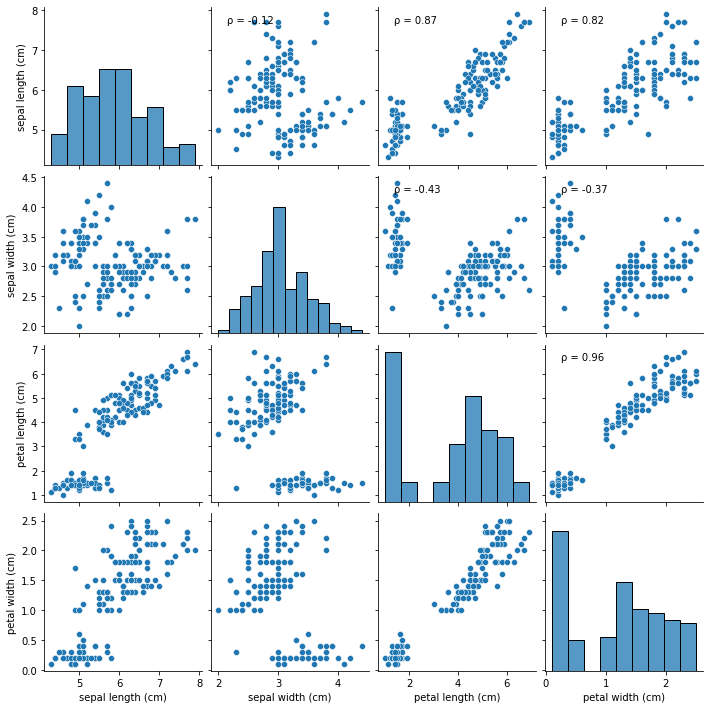

In [ ]:
g =sns.pairplot(data_iris)
g.map_upper(corrfunc)
plt.show()

HIGH CORRELATIONS AMONG INDEPENDENT VARIABLES LEAD OT "MULTI COLLINEARITY PROBLEM"


# Scaling with mean and Standard deviation value (Z score)

In [ ]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

# Principle Componenet Analysis

In [ ]:
# Applying PCA function on training
# and testing set of X component
from sklearn.decomposition import PCA
 
pca = PCA()
 
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)


In [ ]:
# Your Eigen values
pca.explained_variance_

array([2.9842898 , 0.88756774, 0.1500207 , 0.01852579])

In [ ]:
# Your Eigen Vectors, normalized linear combinations of the variables
pca.components_

array([[ 0.5076632 , -0.3069075 ,  0.57712443,  0.56126041],
       [-0.43254739, -0.89851078, -0.03140952, -0.06778334],
       [-0.70111237,  0.28428278,  0.14858559,  0.63682577],
       [-0.25223457,  0.13292654,  0.80241084, -0.52425671]])

Output of R Programming

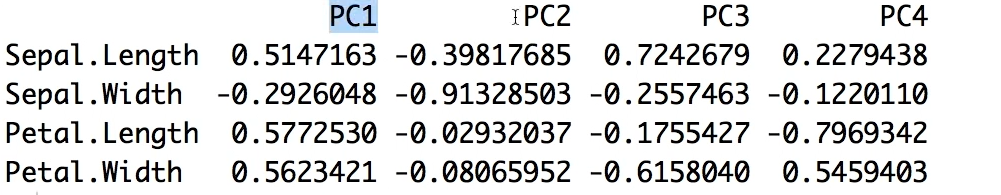

# Variablity Explaination

Text(0, 0.5, 'cumulative explained variance')

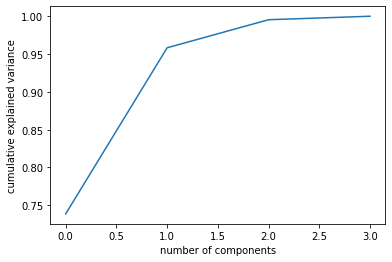

In [ ]:
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')

In [ ]:
explained_variance = pca.explained_variance_ratio_
print(explained_variance*100)

[73.86117265 21.9673016   3.71301241  0.45851334]


# Orthogonality of PC's

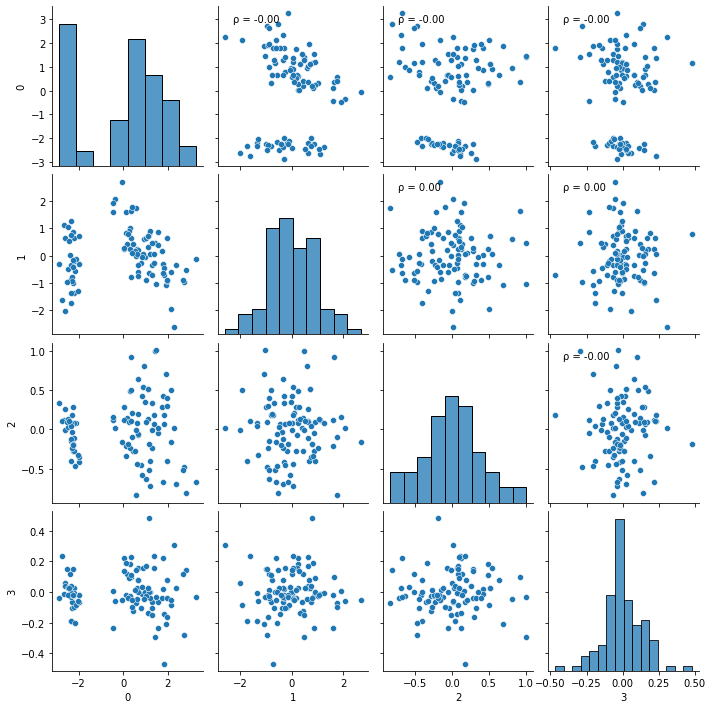

In [ ]:
components = pca.fit_transform(X_train)
g = sns.pairplot(pd.DataFrame(components))
g.map_upper(corrfunc)
plt.show()

Multi Collinearity Problem solved

# Scree Plot

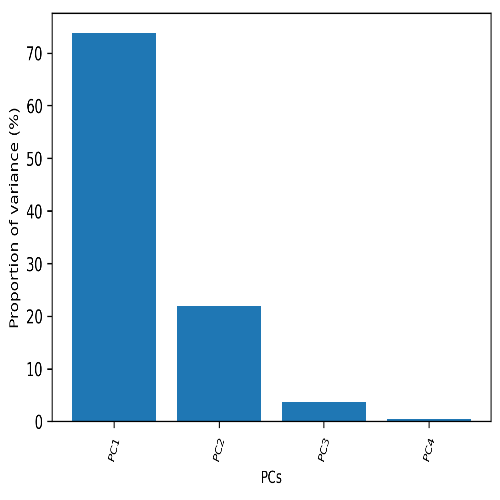

In [ ]:
loadings = pca.components_
cluster.screeplot(obj=[['PC1','PC2','PC3','PC4'], pca.explained_variance_ratio_])

img = cv2.imread("screeplot.png")

imS = cv2.resize(img, (500, 500))
cv2_imshow(imS)


# Bi Plot

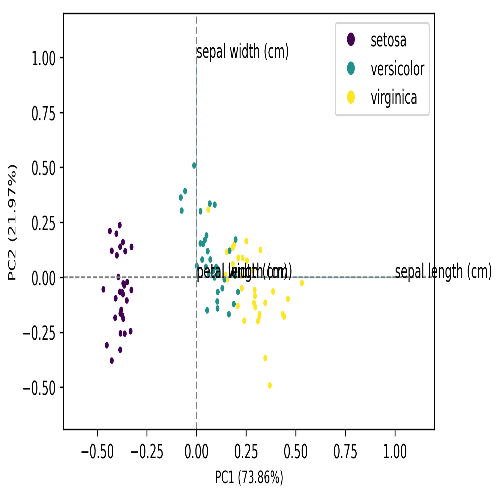

In [ ]:
# get biplot
target=pd.Series(y_train['target'].replace({0: 'setosa', 1: 'versicolor', 2: 'virginica'}).values)
pca_scores = X_train
loadings = pca.components_
pca.explained_variance_

cluster.biplot(cscore=pca_scores, 
               loadings=loadings, 
               labels=['sepal length (cm)','sepal width (cm)','petal length (cm)','petal width (cm)'], 
               var1=round(pca.explained_variance_ratio_[0]*100, 2),
               var2=round(pca.explained_variance_ratio_[1]*100, 2),
               colorlist=target)
img = cv2.imread("biplot_2d.png")
imS = cv2.resize(img, (500, 500))
cv2_imshow(imS)

# Classification

In [ ]:
knn_pca = KNeighborsClassifier(7)
knn_pca.fit(X_train,y_train)
print("Train score after PCA",knn_pca.score(X_train,y_train),"%")
print("Test score after PCA",knn_pca.score(X_test,y_test),"%")

Train score after PCA 0.97 %
Test score after PCA 0.96 %
